## UrbanRentSolutions - PRICE PREDICTOR


In [23]:
import numpy as np
import pandas as pd

housing = pd.read_csv('Data.csv')
housing.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Histogram of all features and label

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

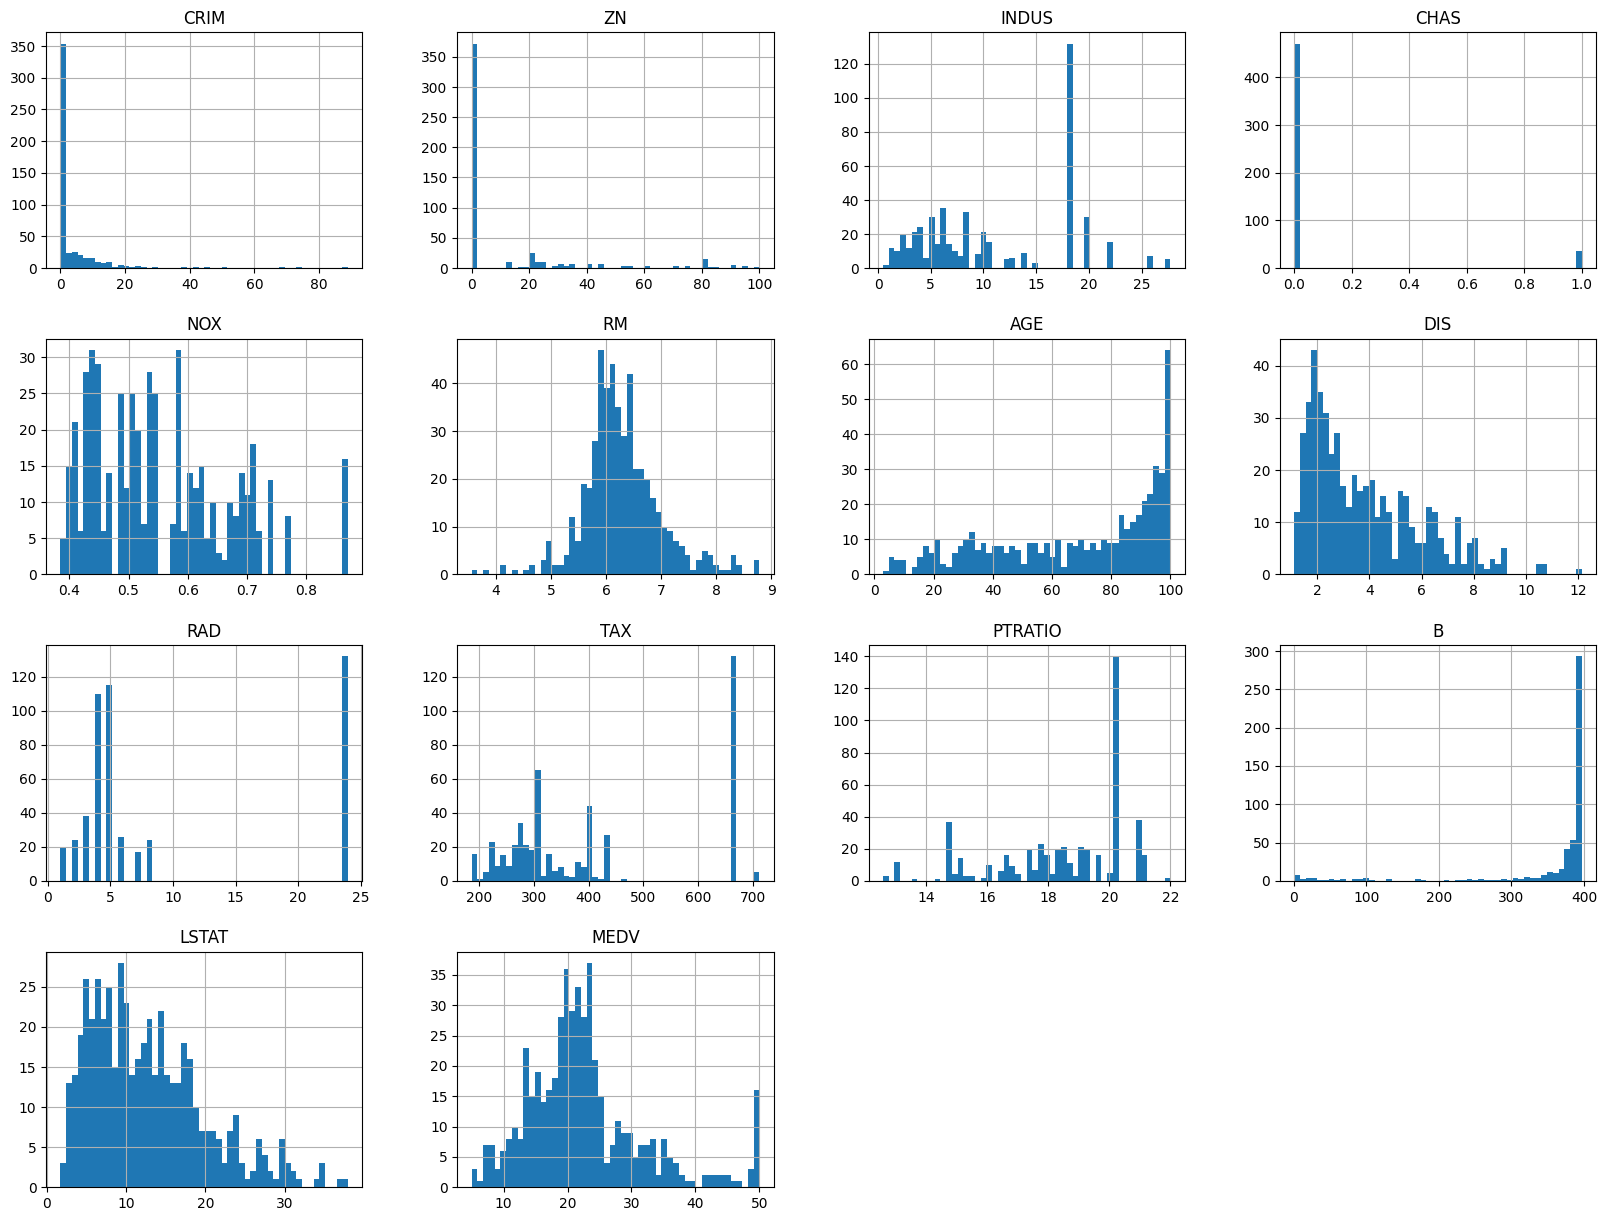

In [24]:
housing.hist(bins=50, figsize=(20, 15))

## Looking for corelation

In [25]:
correlation_matrix = housing.corr()
correlation_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.693504
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

## Train-Test Split (StratifiedShuffle)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Removing label from features

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set['MEDV']

## Missing Attributes
1. get rid of the missing data point's whole row.
2. get rid of the whole attribute column of missing attribute.
3. set the value of the missing attributes to some value(0 or mean or median)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('my_standard', StandardScaler()),
])

In [29]:
housing_transformed = my_pipeline.fit_transform(housing)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()

# model = DecisionTreeRegressor()

model = RandomForestRegressor()

model.fit(housing_transformed, housing_labels)

RandomForestRegressor()

In [31]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
piped_data = my_pipeline.transform(some_data)

In [32]:
model.predict(piped_data)


array([22.378, 25.5  , 16.346, 23.385, 23.57 ])

In [33]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluting the model

In [34]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_transformed)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [35]:
rmse

1.2691909639491994

1.Above mse(mean_sqaured_error) is too high so, we need to discard this model and choose another.

2.OVERFITTED OUR TRAINING DATA BY USE OF DECISIONTREEREGRESSOR - becouse DECISIONTREEREGRESSOR learns the NOISE instead of the TRENDS

Using better evalution techinque - CROSSVALIDATION()

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing_transformed, housing_labels, scoring='neg_mean_squared_error', cv=10)

rmse_score = np.sqrt(-scores)
rmse_score

array([2.87605993, 2.89452689, 4.53927634, 2.64940984, 3.46403031,
       2.67686436, 4.68458813, 3.49368471, 3.25331854, 3.20015457])

Changing the model to linearRegressor again to check how cross_val works on the linearRegressor data

In [37]:
def show_score_details(scores):
    print("Scores:", scores)
    print(f'\nMean: {np.mean(scores)}\nStnd. deviation: {np.std(scores)}')

In [38]:
show_score_details(rmse_score)

Scores: [2.87605993 2.89452689 4.53927634 2.64940984 3.46403031 2.67686436
 4.68458813 3.49368471 3.25331854 3.20015457]

Mean: 3.3731913604929202
Stnd. deviation: 0.6805576802194414


3. Now using RandomForest model

## Testing the model on the test data

In [39]:
test_data = strat_test_set.drop(['MEDV'], axis=1)
test_labels = strat_test_set['MEDV'].copy()

piped_test_data = my_pipeline.transform(test_data)
test_prediction = model.predict(piped_test_data)

test_mse = mean_squared_error(test_labels, test_prediction)
test_rmse = np.sqrt(test_mse)

In [40]:
print(test_prediction, list(test_labels))

[24.364 11.486 25.249 21.715 18.09  14.943 19.835 14.246 31.92  40.646
 19.62  11.325 23.695 25.729 19.423 10.71  31.515 14.439 23.523 18.898
 19.45  18.045 15.877 22.019 17.914 31.178 16.33  33.755  8.781 33.16
 24.176 20.944 22.849 10.786 21.017 11.201 42.49  24.558 23.688 42.467
 23.956 22.118 20.936 20.418 19.561 33.829 44.798 19.943 20.382 22.161
 21.624 14.513 21.004 14.751 24.603 33.534 41.844 29.475 19.506 20.536
 46.663  9.66  18.857 25.191 14.791 33.815 19.94  18.239 19.323 35.082
 26.065 22.622 21.296 22.617 34.83  13.026 15.862 19.788 20.829 21.11
 22.3   21.1   14.021 22.687 20.322 21.147 15.29  21.131 21.795 23.048
 18.331 26.758  7.133 26.047 19.483 29.294 19.919 31.992 15.061 25.487
 21.43  20.755] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

## SAVING MODEL

In [41]:
from joblib import dump, load
dump(model, 'UrbanRentSolutions.joblib') 

['UrbanRentSolutions.joblib']

## MODEL USAGE

In [42]:
model = load('UrbanRentSolutions.joblib')

feature = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       10.24181194, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

model.predict(feature)

array([41.548])